/home/willy/anaconda3/envs/twod/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


 Mean position of the surface is [ 2.4995      0.          0.         33.19606525]
Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD1, 1>, <Residue RBD2, 2>, <Residue RBD3, 3>]>
(5000, 3, 4)
[ 2.4995     -8.25808128 32.50835574 44.40118825] pos mean
[ 2.4995     -2.19536122  0.60327955 44.40118825] pos centered
(5000,)
There are 4854  frames < 50 A in Z
Taking 1000 closest frames to surface...


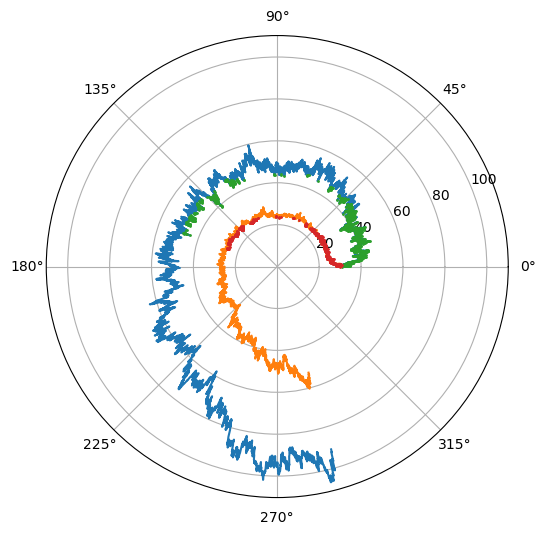

(1000, 3, 4)


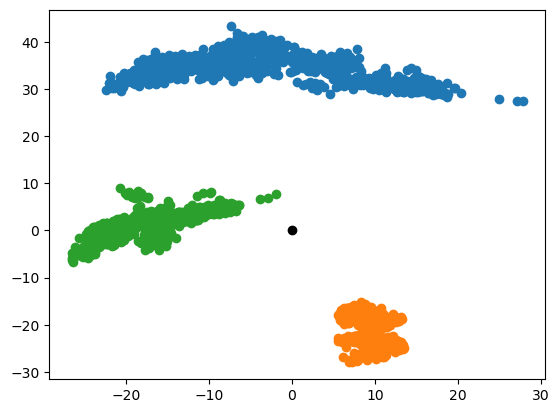

(3, 4) MeanPos


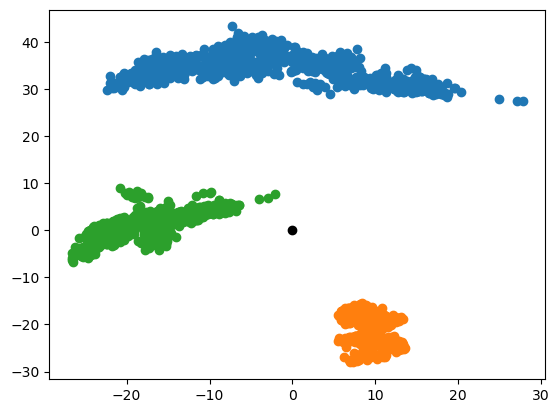

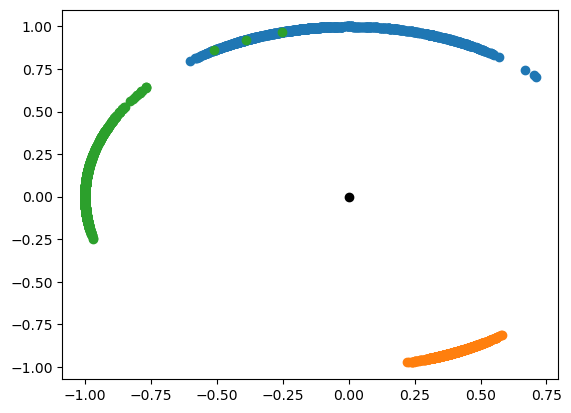

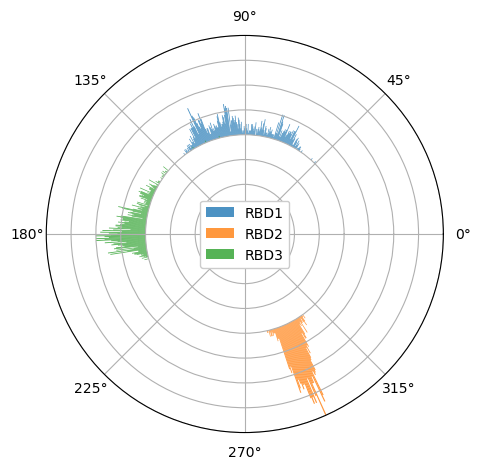

In [1]:
# Omicron open 10 hidrophilic

import numpy as np
import MDAnalysis as mda
from twodanalysis import BioPolymer2D
import matplotlib.pyplot as plt

caso='omicron_open_10_hydrophilic'
pdb = caso+'/md_nowater.pdb'
traj =caso+'/md_nowater_short.xtc'


u=mda.Universe(pdb,traj)

sel_RBD1 = "protein and resid 332 to 523 and index 1 to 20000"
sel_RBD2 = "protein and resid 332 to 523 and index 20000 to 40000"
sel_RBD3 = "protein and resid 332 to 523 and index 40000 to 60000"
sel_ALL  = 'all'#"protein and resid 332 to 523"

surf_sel = "resname DOL and name O1 and prop z > 16"   # AJUSTA

ag1 = u.select_atoms(sel_RBD1)
ag2 = u.select_atoms(sel_RBD2)
ag3 = u.select_atoms(sel_RBD3)
ag_all = u.select_atoms(sel_ALL)
surf = u.select_atoms(surf_sel)

nT = len(u.trajectory)
coords4 = np.zeros((nT, 4, 3), dtype=float)  # 3 RBD + 1 SURF

for i, ts in enumerate(u.trajectory):
    com_all = ag_all.center_of_mass()
    c1 = ag1.center_of_mass()
    c2 = ag2.center_of_mass()
    c3 = ag3.center_of_mass()

    # XY centrado por frame
    coords4[i,0,0:2] = c1[0:2] - com_all[0:2]
    coords4[i,1,0:2] = c2[0:2] - com_all[0:2]
    coords4[i,2,0:2] = c3[0:2] - com_all[0:2]

    # Z absoluto (luego BioPolymer2D lo pone relativo a SURF)
    coords4[i,0,2] = c1[2]
    coords4[i,1,2] = c2[2]
    coords4[i,2,2] = c3[2]

    # átomo SURF: (0,0,z_surf)
    coords4[i,3,2] = surf.positions[:,2].mean()

coords4[:, 0:3, 0] -= 10

# Universe virtual
vU = mda.Universe.empty(
    n_atoms=4, n_residues=4,
    atom_resindex=[0,1,2,3],
    trajectory=True
)
vU.add_TopologyAttr("names",    ["RBD1","RBD2","RBD3","SURF"])
vU.add_TopologyAttr("resnames", ["RBD1","RBD2","RBD3","SURF"])
vU.add_TopologyAttr("resids",   [1, 2, 3, 4])
vU.add_TopologyAttr("masses",   [1.0, 1.0, 1.0, 1.0])
vU.load_new(coords4)

poly = vU.select_atoms("resid 1 2 3")
biopolV = BioPolymer2D(poly, surf_selection="resname SURF")


select_res = "resid 1 2 3"
Nframes = 1000
zlim = 50   # ajusta según z_rel.min()

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'}, figsize=(6, 6))
plt.sca(ax)

hist_arr, pos_hist = biopolV.PolarAnalysis(
    select_res, Nframes,
    zlim=zlim,
    plot=True,
    control_plots=True,
    resolution=0.1
)

# Crear una lista de etiquetas para la leyenda (sin resids)
labels = ['RBD1', 'RBD2', 'RBD3']


# Usar la lista de etiquetas para la leyenda
ax.legend(labels=labels, loc='center', bbox_to_anchor=(0.5, 0.5), framealpha=1)
plt.savefig(caso+'.png',dpi=200)
plt.show()


Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD1, 1>]>
(5000, 1, 4)
[ 2.4995     -4.59794516 59.27410813 56.16265386] pos mean
[ 2.4995      1.4647749  27.36903194 56.16265386] pos centered
(5000,)
There are 2302  frames < 50 A in Z
Taking 1000 closest frames to surface...
(1000, 1, 4)
(1, 4) MeanPos
Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD1, 1>]>
(5000, 1, 4)
[ 2.4995     -4.59794516 59.27410813 56.16265386] pos mean
[ 2.4995      1.4647749  27.36903194 56.16265386] pos centered
(5000,)
There are 2302  frames < 50 A in Z
Taking 1000 closest frames to surface...
(1000, 1, 4)
(1, 4) MeanPos
Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD1, 1>]>
(5000, 1, 4)
[ 2.4995     -4.59794516 59.27410813 56.16265386] pos mean
[ 2.4995      1.4647749  27.36903194 56.16265386] pos centered
(5000,)
There are 2302  frames < 50 A in Z
Taking 1000 closest fr

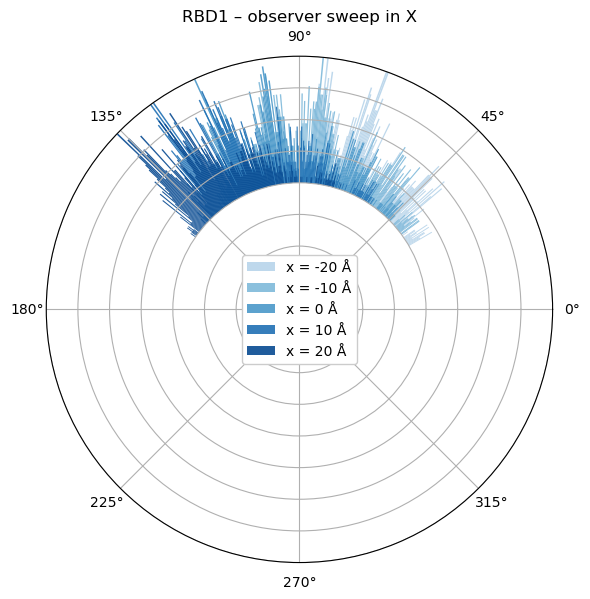

Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD2, 2>]>
(5000, 1, 4)
[ 2.4995      2.33273639  8.40341758 29.18777217] pos mean
[  2.4995       8.39545645 -23.5016586   29.18777217] pos centered
(5000,)
There are 4854  frames < 50 A in Z
Taking 1000 closest frames to surface...
(1000, 1, 4)
(1, 4) MeanPos
Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD2, 2>]>
(5000, 1, 4)
[ 2.4995      2.33273639  8.40341758 29.18777217] pos mean
[  2.4995       8.39545645 -23.5016586   29.18777217] pos centered
(5000,)
There are 4854  frames < 50 A in Z
Taking 1000 closest frames to surface...
(1000, 1, 4)
(1, 4) MeanPos
Computing Polar Analysis from frame 0 (t=0.0ns) to 5000 (t=5.0ns) 
<ResidueGroup [<Residue RBD2, 2>]>
(5000, 1, 4)
[ 2.4995      2.33273639  8.40341758 29.18777217] pos mean
[  2.4995       8.39545645 -23.5016586   29.18777217] pos centered
(5000,)
There are 4854  frames < 50 A in Z
Taking 100

In [ ]:
import matplotlib.cm as cm

rbd_sel = "resid 1"
x_offsets = [-20, -10, 0, 10, 20]
cmap = cm.Blues
colors = cmap(np.linspace(0.3, 0.9, len(x_offsets)))


fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(6,6))
plt.sca(ax)

for x, col in zip(x_offsets, colors):
    biopolV.PolarAnalysis(
        "resid 1",
        Nframes,
        zlim=zlim,
        plot=True,
        control_plots=False,
        resolution=0.1,
        observer=(x, 0.0),
        ax=ax,
        color=col,
        label=f"x = {x} Å",
        alpha=0.9
    )

ax.set_title("RBD1 – observer sweep in X")
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5), framealpha=1)
plt.savefig(caso+'_RBD1.png',dpi=200)
plt.show()



rbd_sel = "resid 2"
x_offsets = [5, 10, 15]

cmap = cm.Oranges
colors = cmap(np.linspace(0.4, 0.9, len(x_offsets)))

fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(6,6))
plt.sca(ax)

for x, col in zip(x_offsets, colors):
    biopolV.PolarAnalysis(
        rbd_sel,
        Nframes,
        zlim=zlim,
        plot=True,
        control_plots=False,
        resolution=0.1,
        observer=(x, 0.0),
        ax=ax,
        color=col,
        label=f"x={x}",
        alpha=0.85
    )

ax.set_title("RBD2 – small observer shifts")
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5), framealpha=1)
plt.savefig(caso+'_RBD2.png',dpi=200)
plt.show()





rbd_sel = "resid 3"

x_vals = [ -15, -20, -25, -30]
y_vals = [ -20,  -20,  -20,  -20,  -20]

cmap = cm.Greens
colors = cmap(np.linspace(0.3, 0.9, len(x_vals)))

fig, ax = plt.subplots(subplot_kw={'projection':'polar'}, figsize=(6,6))
plt.sca(ax)

for (x, y), col in zip(zip(x_vals, y_vals), colors):
    biopolV.PolarAnalysis(
        rbd_sel,
        Nframes,
        zlim=zlim,
        plot=True,
        control_plots=False,
        resolution=0.1,
        observer=(x, y),
        ax=ax,
        color=col,
        label=f"x={x}, y={y}",
        alpha=0.85
    )

ax.set_title("RBD3 – observer sweep (x,y)")
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5), framealpha=1)
plt.savefig(caso+'_RBD3.png',dpi=200)
plt.show()